In [2]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
## load the dataset 

data  = xr.open_dataset('datasets/air.mon.ltm.nc')
data

/home/posiden/anaconda3/envs/climate-gpt/lib/python3.9/site-packages/xarray/coding/times.py:992: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/home/posiden/anaconda3/envs/climate-gpt/lib/python3.9/site-packages/xarray/core/indexing.py:526: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(self.get_duck_array(), dtype=dtype)


<xarray.Dataset> Size: 17MB
Dimensions:             (level: 17, lat: 73, lon: 144, time: 12, nbnds: 2)
Coordinates:
  * level               (level) float32 68B 1e+03 925.0 850.0 ... 30.0 20.0 10.0
  * lat                 (lat) float32 292B 90.0 87.5 85.0 ... -85.0 -87.5 -90.0
  * lon                 (lon) float32 576B 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * time                (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 ...
Dimensions without coordinates: nbnds
Data variables:
    climatology_bounds  (time, nbnds) datetime64[ns] 192B ...
    air                 (time, level, lat, lon) float32 9MB ...
    valid_yr_count      (time, level, lat, lon) float32 9MB ...
Attributes:
    Conventions:                    CF-1.0
    title:                          Monthly NCEP/DOE Reanalysis 2
    comments:                       Data is from \nNCEP/DOE AMIP-II Reanalysi...
    platform:                       Model
    source:                         NCEP/DOE AMIP-II Reanalysis (Reanalysis-2...
    institution:                    National Centers for Environmental Predic...
    dataset_title:                  NCEP-DOE AMIP-II Reanalysis
    References:                     https://www.psl.noaa.gov/data/gridded/dat...
    source_url:                     http://www.cpc.ncep.noaa.gov/products/wes...
    history:                        Created 2022/01/11 by doMonthLTMNC4
    not_missing_threshold_percent:  minimum 3% values input to have non-missi...

In [5]:
## here we can see the variables are three , but we only need air as that is the one that contains the info we need 

# extract air variable 

data = data['air']
data

<xarray.DataArray 'air' (time: 12, level: 17, lat: 73, lon: 144)> Size: 9MB
[2144448 values with dtype=float32]
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 96B 0001-01-01 00:00:00 ... 0001-12-01 00:00:00
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [137.5 362.5]
    actual_range:   [183.01205 314.30197]

In [6]:
## now since we have lat , lon and time available

## now let us play around and try differnt types of visualisations 

# take the mean along the time and lat and lon to just see the vertical levels structure coming along 


data_levels = data.mean(dim=['lat','lon','time'])

data_levels

<xarray.DataArray 'air' (level: 17)> Size: 68B
array([281.26266, 277.56396, 274.45526, 267.00372, 260.8889 , 252.58217,
       242.07874, 229.63977, 223.56425, 218.62984, 213.85156, 209.06587,
       209.71344, 212.36491, 216.39   , 220.05284, 227.04445],
      dtype=float32)
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0

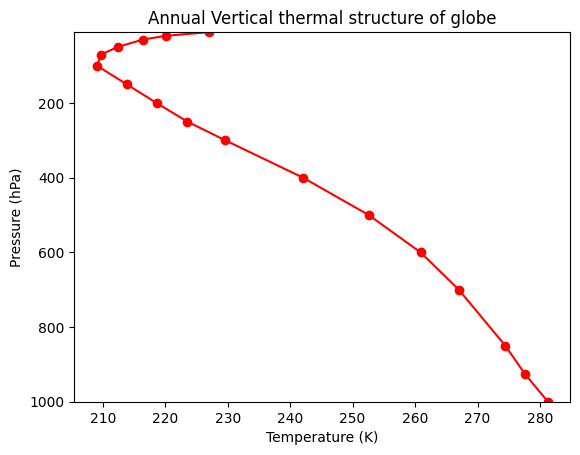

In [14]:
plt.plot(data_levels, data_levels.level,'ro-')
plt.ylim(max(data_levels.level),min(data_levels.level))
# inverse the y axis 
# plt.gca().invert_yaxis()
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Annual Vertical thermal structure of globe')
plt.show()


In [15]:
# Extract the month from the time coordinate
months = data.time.dt.month  # Extracts month numbers

# Select only the months corresponding to JJAS (6, 7, 8, 9)
data_jjas = data.sel(time=months.isin([6, 7, 8, 9]))

# Check the new dataset
data_jjas


<xarray.DataArray 'air' (time: 4, level: 17, lat: 73, lon: 144)> Size: 3MB
array([[[[272.66736, ..., 272.66736],
         ...,
         [244.82472, ..., 244.82472]],

        ...,

        [[242.70139, ..., 242.70139],
         ...,
         [193.10114, ..., 193.10114]]],


       ...,


       [[[267.3551 , ..., 267.3551 ],
         ...,
         [244.15187, ..., 244.15187]],

        ...,

        [[223.26161, ..., 223.26161],
         ...,
         [213.32184, ..., 213.32184]]]], dtype=float32)
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 32B 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [137.5 362.5]
    actual_range:   [183.01205 314.30197]

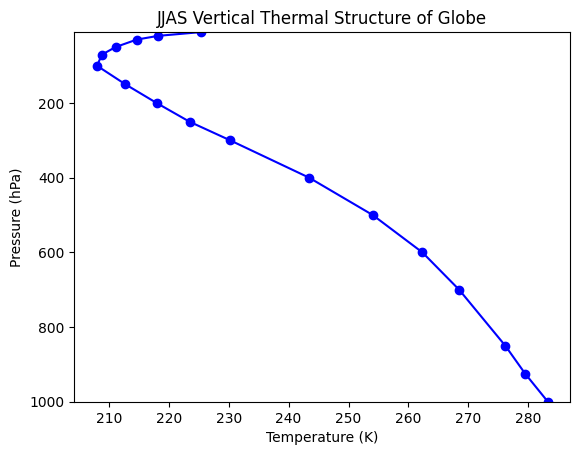

In [16]:
# Compute mean over lat, lon, and selected JJAS time
data_levels_jjas = data_jjas.mean(dim=['lat', 'lon', 'time'])

# Plot the JJAS vertical structure
plt.plot(data_levels_jjas, data_levels_jjas.level, 'bo-')  # Use blue for distinction
plt.ylim(max(data_levels_jjas.level), min(data_levels_jjas.level))
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('JJAS Vertical Thermal Structure of Globe')
plt.show()


In [22]:
# Select latitudes for different regions
tropics = data_jjas.where((data_jjas.lat >= -23.5) & (data_jjas.lat <= 23.5), drop=True)
temperate = data_jjas.where(((data_jjas.lat >= 23.5) & (data_jjas.lat <= 66.5)) | 
                            ((data_jjas.lat <= -23.5) & (data_jjas.lat >= -66.5)), drop=True)
polar = data_jjas.where((data_jjas.lat >= 66.5) | (data_jjas.lat <= -66.5), drop=True)

# Print to check the latitudes
print("Tropics Lats:", tropics.lat.values)
print("Temperate Lats:", temperate.lat.values)
print("Polar Lats:", polar.lat.values)



Tropics Lats: [ 22.5  20.   17.5  15.   12.5  10.    7.5   5.    2.5   0.   -2.5  -5.
  -7.5 -10.  -12.5 -15.  -17.5 -20.  -22.5]
Temperate Lats: [ 65.   62.5  60.   57.5  55.   52.5  50.   47.5  45.   42.5  40.   37.5
  35.   32.5  30.   27.5  25.  -25.  -27.5 -30.  -32.5 -35.  -37.5 -40.
 -42.5 -45.  -47.5 -50.  -52.5 -55.  -57.5 -60.  -62.5 -65. ]
Polar Lats: [ 90.   87.5  85.   82.5  80.   77.5  75.   72.5  70.   67.5 -67.5 -70.
 -72.5 -75.  -77.5 -80.  -82.5 -85.  -87.5 -90. ]


In [21]:
polar

<xarray.DataArray 'air' (time: 4, level: 17, lat: 0, lon: 144)> Size: 0B
array([], shape=(4, 17, 0, 144), dtype=float32)
Coordinates:
  * level    (level) float32 68B 1e+03 925.0 850.0 700.0 ... 50.0 30.0 20.0 10.0
  * lat      (lat) float32 0B 
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) object 32B 0001-06-01 00:00:00 ... 0001-09-01 00:00:00
Attributes: (12/14)
    long_name:      Long Term Mean Monthly Air Temperature on Pressure Levels
    units:          degK
    precision:      2
    GRIB_id:        11
    GRIB_name:      TMP
    var_desc:       Air temperature
    ...             ...
    statistic:      Long Term Mean
    parent_stat:    Individual Obs
    standard_name:  air_temperature
    cell_methods:   time: mean (monthly from 6-hourly values)
    valid_range:    [137.5 362.5]
    actual_range:   [183.01205 314.30197]

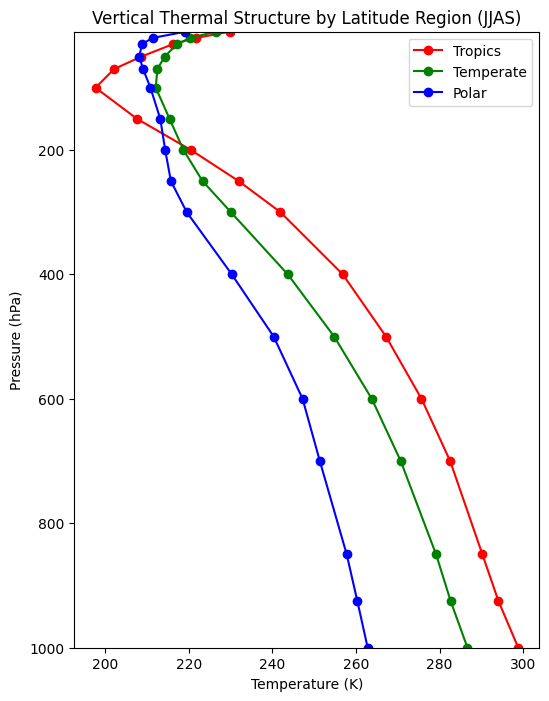

In [24]:
# Compute mean over lat, lon, and time
tropics_mean = tropics.mean(dim=['lat', 'lon', 'time'])
temperate_mean = temperate.mean(dim=['lat', 'lon', 'time'])
polar_mean = polar.mean(dim=['lat', 'lon', 'time'])

# Plot the vertical thermal structure
plt.figure(figsize=(6, 8))

plt.plot(tropics_mean, tropics_mean.level, 'ro-', label='Tropics')
plt.plot(temperate_mean, temperate_mean.level, 'go-', label='Temperate')
plt.plot(polar_mean, polar_mean.level, 'bo-', label='Polar')

plt.ylim(max(data.level), min(data.level))  # Invert y-axis
plt.xlabel('Temperature (K)')
plt.ylabel('Pressure (hPa)')
plt.title('Vertical Thermal Structure by Latitude Region (JJAS)')
plt.legend()
plt.show()
